<a href="https://colab.research.google.com/github/Priyanka95-data/Computer-Vision-Image-Classification/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## End- to-End Multi-class Dog Breed Classification

This notebook builds an end to end multi-class image classifier 
using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at thee cafe and I take photo of a dog, I want to know what breed of dog it is.

## 2. Data 
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data?select=labels.csv

## 3. Evaluation
The evaluation is a file with prediction probabilities for each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with the images (unstructured data) so it's probabbly we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set. (these images have labels)
* There are around 10,000+ images in the test set. (these images have no label as we'll want to predict them).

In [ ]:
# Unzip the uploaded data into google drive.
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

# Get Our Workspace Ready

* Import Tensorflow 2.x
* Import Tensorflow Hub
* Make sure you're using a GPU

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("hub_version:", hub.__version__)

# Check the GPU availabilty
print("GPU", "available (YESSSS!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.2.0
hub_version: 0.8.0
GPU available (YESSSS!!!)


# Getting our data ready (Turning into tensors)

With all the Machine learning models, our data has to be in numerical format. 
So that's what we'll be doing first.Turning our images into Tensors (Numerical Representation)

Let's start by accessing our data and checking out the labels.

In [ ]:
import pandas as pd
labels_csv= pd.read_csv("/content/drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e57ca37ac086752c46e40a90139f9b26  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

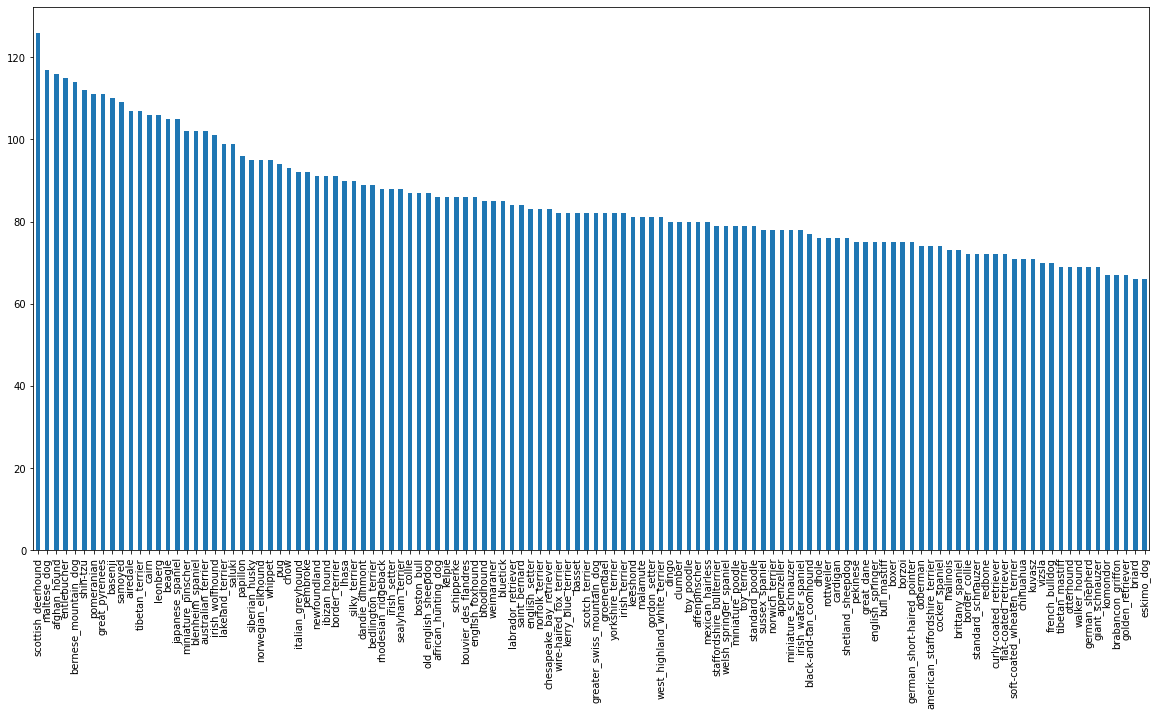

In [ ]:
# How many images are there in each breed?
labels_csv["breed"].value_counts().plot.bar(figsize= (20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

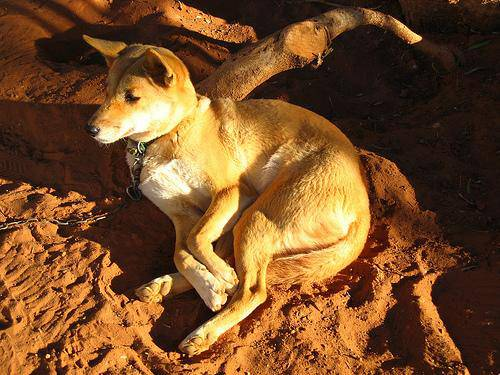

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

Let's get a list of all our image file pathnames

In [ ]:
#Create pathnames from image ID's
filenames= ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

#Check the first 10 
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Check the number of filenames matches the number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/"))== len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target dictionary")

Filenames match actual amount of files!!! Proceed.


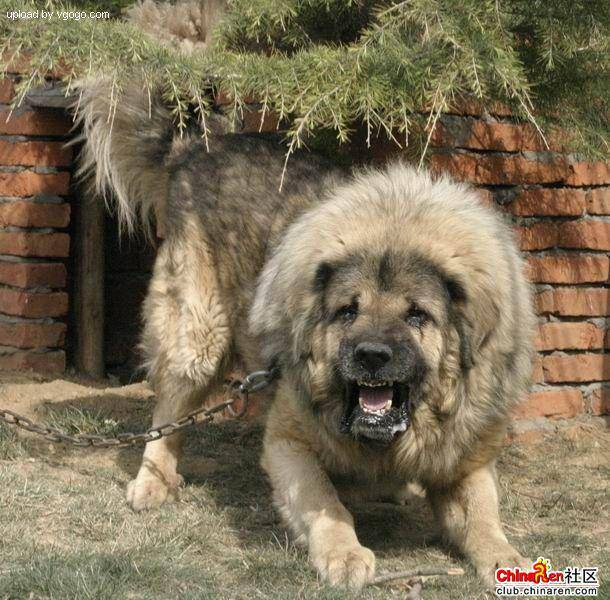

In [ ]:
# One more check
from IPython.display import Image
Image(filenames[9000])

In [ ]:
labels_csv["id"][9000]

'e20e32bf114141e20a1af854ca4d0ecc'

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we have got our training image filepaths in a list let's prepare our labels

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels match number of filenames")
else:
  print("Number of labels do not match number of filenames, check for target directory")  

Number of labels match number of filenames


In [ ]:
# Find the unique label values
unique_breeds= np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0], labels.shape)
labels[0] == unique_breeds

boston_bull (10222,)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels= [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
boolean_labels[0].shape

(120,)

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) #Original label
print(np.where(unique_breeds== labels[0]))  #index where label occurs in boolean array
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own Validation Set
 
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images 
and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@prama {type:"slider", min=1000, max= 10000, step:1000}

In [ ]:
# Let's split our data into train and validations sets
from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val= train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size= 0.2,
                                                random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at training data
X_train[:2], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, F

# Preprocessing Images (Turning images into tensors)

To preprocess our images into tensor, we're going to write a function which does a few things:
1. Take an image filepath as an input.
2. Use Tensorflow to read the file and save it to a variable,
`image`.
3. Turn our `image` (a jpg) into Tensors.
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image`.


Before we do, let's see what importing an array looks like.

In [ ]:
# Convert image into Numpy array
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
image = imread(filenames[40])
image.shape

(293, 400, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[255, 246, 252],
        [254, 237, 243],
        [253, 237, 240],
        ...,
        [112, 164,  89],
        [ 99, 151,  79],
        [ 94, 146,  74]],

       [[255, 250, 248],
        [255, 251, 249],
        [255, 246, 242],
        ...,
        [ 96, 148,  74],
        [ 88, 140,  68],
        [ 90, 141,  72]]], dtype=uint8)

In [ ]:
# Turn image into tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 400, 3), dtype=uint8, numpy=
array([[[255, 246, 252],
        [254, 237, 243],
        [253, 237, 240],
        ...,
        [112, 164,  89],
        [ 99, 151,  79],
        [ 94, 146,  74]],

       [[255, 250, 248],
        [255, 251, 249],
        [255, 246, 242],
        ...,
        [ 96, 148,  74],
        [ 88, 140,  68],
        [ 90, 141,  72]]], dtype=uint8)>

Now we have seen what an image looks like as a Tensor,let's make a function to preprocess them.

1. Take an image filepath as an input.
2. Use Tensorflow to read the file and save it to a variable,
`image`.
3. Turn our `image` (a jpg) into Tensors.
4. Normalize our `image` (convert color channel values from 
0-255 into 0-1).
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`.




In [ ]:
#Define image size
IMG_SIZE = 224

#Create a function for preprocessing images
def process_image(image_path, img_size= IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  #Read the image file
  image= tf.io.read_file(image_path)
  #Turn the jpeg image into numerical tensors with 3 color channels (red, green, blue)
  image= tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 into 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value (224,224)
  image= tf.image.resize(image, size= [IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

Why turn our data into batches??
Let's say you're trying to process 10,000+  images in one go... they all might not fit into memory.

So that's why we do about 32(this is batch size) images at a time(you can manually adjust the batch size if need be).

In order to use TensorFlow efectively,we need our data in the form of TensorFlow tuples which look like this: (image, label).



In [ ]:
#Create a simple function to return a tuple(image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, 
  processes the image and returns a type of (image, label).  
  """
  image= process_image(image_path)
  return image, label

In [ ]:
#Demo of the above
(process_image(X[42]) , tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we'ver got a way to turn our data into tuples of Tensors
in the form: `(image, label)`. Let's make a function to turn
all of our data(`X` & `y`) into batches!

In [ ]:
#Define the batch size, 32 is a good start
BATCH_SIZE= 32

#Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size= BATCH_SIZE, valid_data= False, test_data= False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """

  #If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (NO LABELS)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  #If the data is a valid dataset, we don't need to shuffle it.
  elif valid_data:
     print("Creating validation data batches...")
     data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filepaths
                                             tf.constant(y))) #labels
     data_batch= data.map(get_image_label).batch(BATCH_SIZE)
     return data_batch

  else:
    print("Creating training data batches...")
    #Turn filepaths and labels into Tensors
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X),   #filepaths
                                             tf.constant(y)))   #labels                                      
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data= data.shuffle(buffer_size= len(X))

    # Create (image,label) tuples (this also turns the image path into a preprocessed image)
    data= data.map(get_image_label)

    #Turn the training data into batches
    data_batch=  data.batch(BATCH_SIZE)
  return data_batch   

In [ ]:
#Creating training and validation data batches
train_data= create_data_batches(X_train,y_train)
val_data= create_data_batches(X_val, y_val, valid_data= True) 

Creating training data batches...
Creating validation data batches...


In [ ]:
#Check the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing  Data Batches

Our data is now in batches, however these can be a little hard to understand/comprehend, let's visualize them!

In [ ]:
import matplotlib.pyplot as plt

#Create a function for viewing  images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  #Setup the figure
  plt.figure(figsize= (10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    #Create subplots(5 rows, 5 columns)
    ax= plt.subplot(5, 5, i+1)
    #Display the image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the gridlines off
    #plt.axis("off")

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
train_images, train_labels= next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          ...,
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01],
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01],
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01]],
 
         [[4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          ...,
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01],
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01],
          [4.00000036e-01, 4.98039246e-01, 2.82352954e-01]],
 
         [[4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          [4.00000036e-01, 4.98039246e-01, 2.74509817e-01],
          ...,
          [4.00000036e-01, 4.98039246e-01, 2.8235

In [ ]:
len(train_images), len(train_labels)

(32, 32)

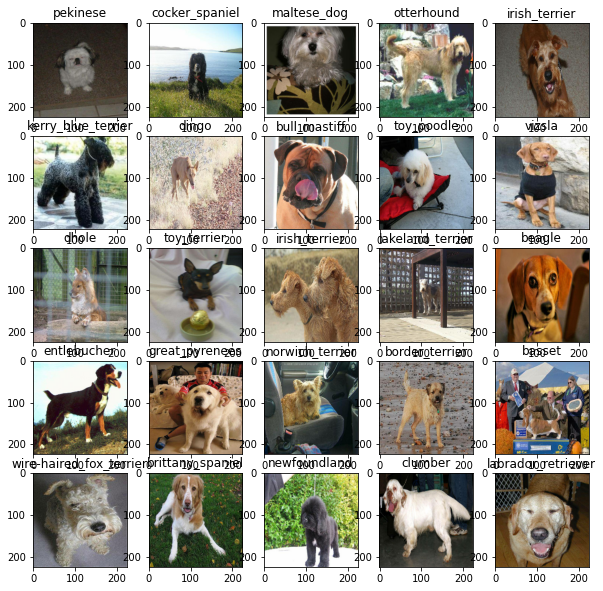

In [ ]:
# Now let's visualize the data in the training batch
train_images, train_labels= next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

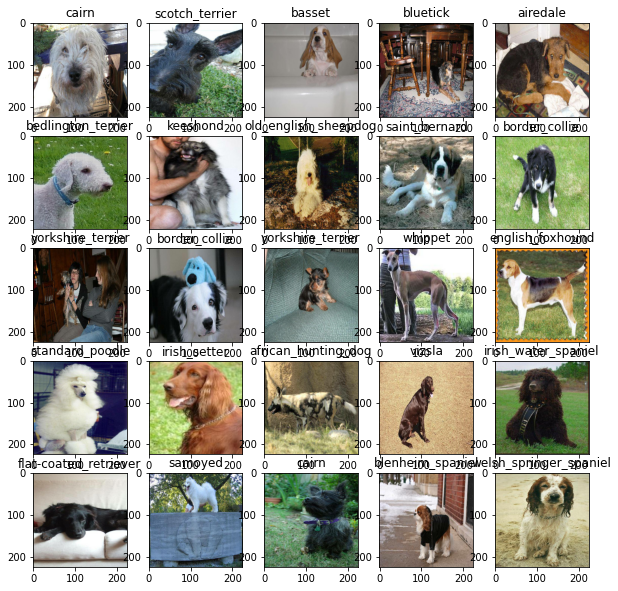

In [ ]:
# Now let's visualize our validation set
val_images, val_labels= next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there are a few things that we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape(image labels in the form of Tensors) of our model.
* The URL of the model we want to use from Tensorflow Hub-
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [ ]:
# Setup input shape to the model
INPUT_SHAPE= [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels

#Setup output shape of the model
OUTPUT_SHAPE= len(unique_breeds)

#Setup model URL from TensorFlow Hub
MODEL_URL= "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and models ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a funcition which:
* Takes input shape, output shape and model we've chosen as  parameters.
* Defines the layers in a Keras model in sequential fashion
(first do this then this, then that).
* Compiles the model (says it should be evaluated and improved.)
* Build the model. (tells the model the input shape it'll be getting).
* Returns the model

All of these steps can be found: 
https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape= INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Building model with:", MODEL_URL)

  #Setup the model layers
  model= tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),   #Layer 1(Input Layer)
    tf.keras.layers.Dense(units= OUTPUT_SHAPE,
                          activation= "softmax")       #Layer 2(Output Layer)                          
                              
  ])

  #Compile the model
  model.compile(
      loss =tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics= ["accuracy"]
  )

  #Build a model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model= create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callback are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create 2 callbacks:

One for TensorBoard which helps track our models progress.
Second for early stopping which prevents our model from training for so long.

## TensorBoard Callback
To setup a TensorBoard callback we need to do 3 things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs of a directory and pass it to our model's fit function.
3. Visualize our model's training logs with the `%tensorboard` magic function (we'll do this after model training). 

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early Stopping Callback

Early stopping helps our model from overfitting by keeping a pause on training if a certain evaluation metrics stops.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping= tf.keras.callbacks.EarlyStopping(monitor= "val_accuracy",
                                                 patience= 3)


# Training  a model(on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.


In [ ]:
NUM_EPOCHS= 100 #@param {type: "slider", min:10, max:100, step:10}

In [ ]:
#Check to make sure if we are still running on GPU
print("GPU", "available(YESS!!!)" if tf.config.list_physical_devices("GPU") else "not avaialable")

GPU available(YESS!!!)


# Let's create function that runs a model.

* Create a model using `create_model()`
* Setup a Tensoflow Callback using `create_Tensorboard_callback`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for `(NUM_EPOCHS)` and the callbacks.
* Return the model  

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
# model= train_model()


In [ ]:
model.save("/content/drive/My Drive/good.h5")

**Question** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent overfitting in Deep neural networks models?

**Note** Overfitting to begin with is a good thing! It means our model is learning!

### Checking the TensorBoard logs

The tensorboard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize it's contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Making and Evaluating predictions using Trained Model

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 93s 13s/step


array([[9.7868294e-03, 1.3115723e-03, 2.2271120e-03, ..., 9.4496080e-04,
        1.5787949e-03, 5.3189076e-03],
       [3.1972369e-03, 2.8003312e-03, 3.3916046e-03, ..., 6.4205113e-03,
        5.2100490e-03, 7.0371237e-03],
       [9.2819077e-04, 6.7026581e-04, 8.8696886e-04, ..., 4.4753833e-04,
        1.8738635e-04, 7.3343457e-04],
       ...,
       [7.7787752e-04, 1.3179160e-03, 6.1691389e-03, ..., 9.9827026e-05,
        7.8015233e-04, 4.0677814e-03],
       [4.6358830e-03, 1.2594147e-02, 6.4601284e-04, ..., 1.3177994e-03,
        2.0734870e-03, 1.9445742e-02],
       [2.8081317e-03, 8.1373792e-04, 3.5268657e-03, ..., 4.7261745e-04,
        2.0262548e-03, 1.5915405e-02]], dtype=float32)

In [ ]:
predictions[0]

array([9.7868294e-03, 1.3115723e-03, 2.2271120e-03, 8.5104366e-05,
       1.2633510e-02, 3.7314715e-03, 5.2115317e-02, 8.3089963e-04,
       4.8897183e-03, 1.8704806e-03, 7.7085383e-04, 8.6473004e-04,
       4.4105416e-03, 1.4334592e-03, 1.0040745e-02, 1.8702341e-02,
       5.4799230e-04, 5.3905854e-03, 1.3932684e-03, 3.1220156e-04,
       2.3576473e-03, 1.1434947e-03, 5.6467182e-03, 1.1167544e-03,
       2.9857340e-03, 2.1937948e-03, 4.6009943e-03, 1.1082461e-02,
       9.3772507e-04, 3.9748705e-04, 1.5146903e-03, 7.3069997e-02,
       1.7851809e-03, 5.5046715e-03, 5.4008793e-03, 1.8653980e-02,
       6.7930361e-03, 1.0844108e-03, 1.2426820e-03, 2.7170384e-03,
       7.1143345e-03, 2.1890446e-03, 1.9152667e-03, 2.8145360e-03,
       4.0609407e-04, 9.1273012e-03, 1.0174140e-03, 8.5245789e-04,
       4.3983432e-03, 7.4776751e-03, 6.7838342e-03, 9.6232427e-04,
       1.1523766e-02, 9.7721992e-03, 1.0550630e-02, 2.3035655e-02,
       9.0303905e-02, 7.0907846e-03, 2.2999048e-03, 1.3638948e

In [ ]:
np.sum(predictions[1])

1.0

In [ ]:
predictions.shape

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.16929042e-03 1.12079093e-02 3.93573311e-04 1.67799729e-03
 1.46225956e-03 5.15180966e-03 8.24159360e-04 5.40120760e-04
 1.67452972e-02 2.28993711e-03 5.51187340e-03 1.27505092e-03
 4.80424520e-03 7.26416614e-03 1.76941929e-03 4.96604829e-04
 1.14841131e-03 1.95971763e-04 3.43590118e-02 2.89061427e-04
 3.39776557e-03 4.61750291e-03 3.03589710e-04 6.23153057e-03
 1.15723863e-01 3.73842008e-03 3.29513364e-02 3.40172998e-03
 7.80260074e-04 1.50790636e-03 4.45700362e-02 4.48244177e-02
 3.65677522e-03 1.41800204e-02 4.94943280e-03 6.04875444e-04
 2.61041336e-03 1.44974119e-03 7.13138608e-03 9.80497152e-03
 1.16106868e-02 4.72804625e-03 7.57786352e-03 2.87029863e-04
 8.40176083e-03 9.75037343e-04 6.77922089e-03 6.46447064e-03
 3.47093795e-03 5.53363527e-04 1.91799062e-03 1.23618860e-02
 1.00145768e-03 1.80526660e-03 2.95109465e-03 1.03843175e-02
 1.12659708e-02 1.77763531e-03 1.21957622e-03 1.00751489e-03
 2.92990357e-03 1.10993637e-02 1.86460058e-03 1.71971496e-03
 5.27286250e-03 2.914229

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on.

**Note**: Predictions probabilites are also called confidence levels.

In [ ]:
# Turn the prediction probabilities into their respective label (easier to understand) 
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)] 
# Get a predicted label based on an array of prediction probabilities
pred_label= get_pred_label(predictions[70])  
pred_label

'yorkshire_terrier'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels).

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]  

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
# images_ = []
# labels_ = []

# #Loop through unbatched data
# for image,label in val_data.unbatch().as_numpy_iterator():
#   images_.append(image)
#   labels_.append(label)
  
# images_[0], labels_[0]  

Now we've got ways to get:
* Prediction Labels
* Validation Labels (truth labels)
* Validation images

Let's make some functions to make all these a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities into prediction label.
* Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

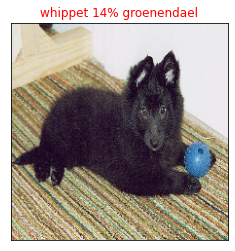

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n= 77)

Now've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find a prediction using `get_preds_label()`
* Find the top 10:
  * Prediction probabilities index
  *  Prediction probabilities value
  *  Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

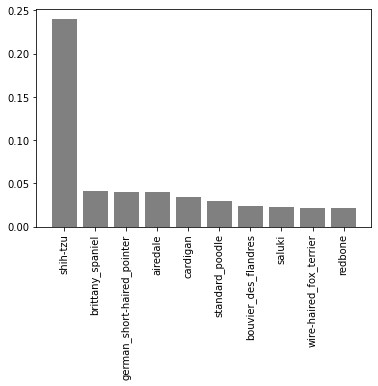

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some functions tohelp us visualize our predictions and evaluate our model, let's check out a few!

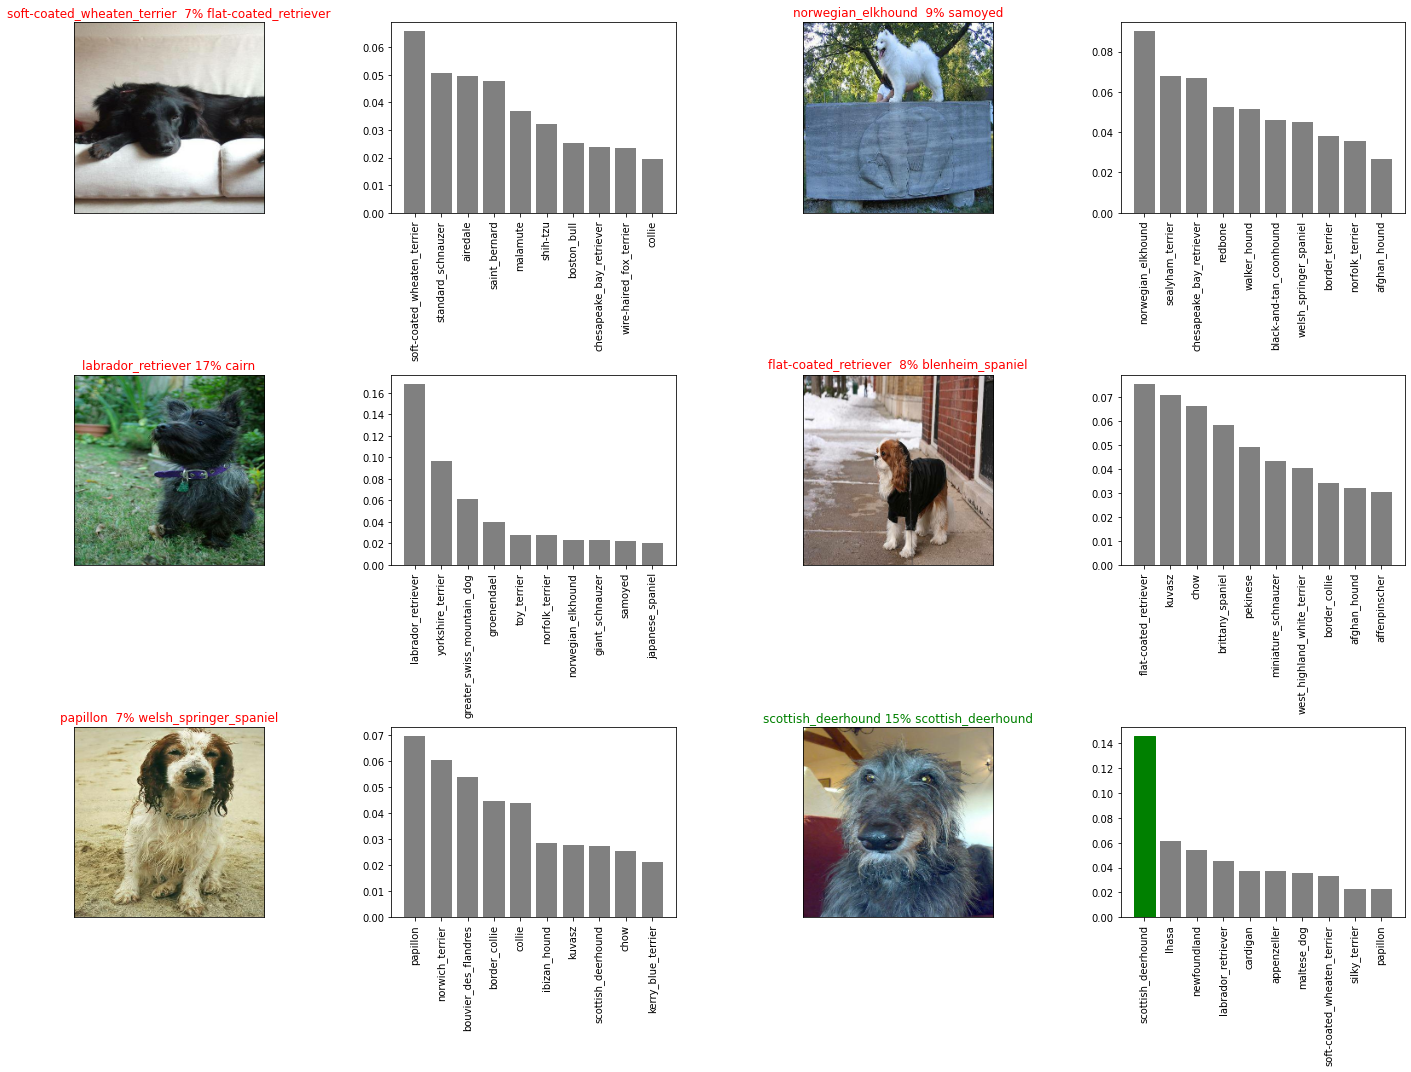

In [ ]:
# Let's checkout a few predictions  and their different values
i_multiplier= 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities= predictions,
            labels= val_labels,
            images= val_images,
            n= i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities= predictions,
                 labels= val_labels,
                 n =i+i_multiplier)
  
plt.tight_layout(h_pad= 1.0)  
plt.show()  

## Saving and reloading a trained model 

In [ ]:
#Create a function to save a model
def save_model(model,suffix= None):
  """
  Saves a given model in a models directory and appends a suffix(string).
  """
  #Create a model directory pathname with current time
  modeldir= os.path.join("/content/drive/My Drive/Dog Vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path= modeldir+ "-" + suffix + ".h5" #Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
#Create a function to load a trained model
def load_model(model_path): 
  """ 
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model= tf.keras.models.load_model(model_path,
                                    custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

Now we've got functions to save and load a trained model, Let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix= "1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Vision/models/20200530-01201590801635-1000-images-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Vision/models/20200530-01201590801635-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#Load a trained model
loaded_1000_image_model= load_model("/content/drive/My Drive/Dog Vision/models/20200528-02361590633384-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/My Drive/Dog Vision/models/20200528-02361590633384-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 112ms/step - loss: 5.6034 - accuracy: 0.0150


[5.6033854484558105, 0.014999999664723873]

In [ ]:
#Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 114ms/step - loss: 1.2681 - accuracy: 0.6800


[1.2681009769439697, 0.6800000071525574]

## Training a big dog model (on the full data)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
 # Create a model for full mofrl
 full_model= create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard= create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping= tf.keras.callbacks.EarlyStopping(monitor= "accuracy",
                                                            patience= 3)

**Note**: Running cell below will take a little while (mybe upto 30minutes for the first epoch) because the GPU we're using in the runtime has to load all the images into the memory.

In [ ]:
# Fit the full model on the full data
# full_model.fit(x= full_data,
               # epochs= NUM_EPOCHS,
               # callbacks= [full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix= "full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/My Drive/Dog Vision/models/20200530-01201590801653-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/My Drive/Dog Vision/models/20200530-01201590801653-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
#Load the model
loaded_full_model= load_model('drive/My Drive/Dog Vision/models/20200528-05231590643437-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200528-05231590643437-full-image-set-mobilenetv2-Adam.h5


## Making predictions on Test Data

Since our data has been trained on images in the form of Tensor Batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test data` parameters to `true` (since the test data doesn't have lables).
* Make a prediction array by passing the test data batches to the `predict` method called on our model.


In [ ]:
# Load the test image filenames
test_path = "drive/My Drive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog Vision/test/ea111bb38037c9922185a0e9513391d7.jpg',
 'drive/My Drive/Dog Vision/test/effcbcfa58ba87eac8439b7106d8623c.jpg',
 'drive/My Drive/Dog Vision/test/e85b19a69be67eaef9fe58b7e689ee81.jpg',
 'drive/My Drive/Dog Vision/test/f01832dc0e1d00e4e5a9286bd88dede2.jpg',
 'drive/My Drive/Dog Vision/test/f56b3708592637432ac53d7f0684dfa8.jpg',
 'drive/My Drive/Dog Vision/test/ef7462aaef0907fbe406e23a4462f086.jpg',
 'drive/My Drive/Dog Vision/test/e8319b1410a984291d71a3e60c84d86c.jpg',
 'drive/My Drive/Dog Vision/test/eca94e609a77c2ed87b79c3c08a11a62.jpg',
 'drive/My Drive/Dog Vision/test/eb7a787cace9fda676485652daaaf43e.jpg',
 'drive/My Drive/Dog Vision/test/f3135e277d13e886038661fd42fef154.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data= create_data_batches(test_filenames,test_data= True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make prediction on test data batch using the loaded full model
# test_predictions = loaded_full_model.predict(test_data,
                                           #verbose=1)

In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
# np.savetxt("/content/drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter= ",")

In [ ]:
# Load predictions (Numpy array) from csv file
test_predictions= np.loadtxt("/content/drive/My Drive/Dog Vision/preds_array.csv", delimiter= ",")

In [ ]:
test_predictions[:10]

array([[7.44810293e-08, 4.77277115e-12, 2.66163958e-09, ...,
        3.31689060e-12, 2.07650018e-07, 1.65614047e-08],
       [8.17354667e-05, 4.36049913e-06, 2.13348869e-07, ...,
        2.24070842e-08, 9.03978730e-07, 1.18323187e-05],
       [1.57593352e-08, 1.36895278e-05, 1.51077472e-07, ...,
        2.46663170e-08, 1.04293822e-05, 4.78540473e-02],
       ...,
       [1.88076846e-10, 1.09760674e-06, 7.07316259e-13, ...,
        4.54507037e-13, 1.72366860e-11, 1.34801534e-12],
       [9.57057350e-11, 3.94867342e-12, 1.33366512e-11, ...,
        2.33033065e-10, 1.24194139e-08, 1.12387610e-09],
       [4.32298884e-14, 9.81309624e-14, 3.85854678e-13, ...,
        1.68279030e-12, 9.41748680e-15, 1.91044249e-14]])

In [ ]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submissions, we find  it wants our models prediction  probability outputs in a DataFrame with an Id column and a column for each different dog breed.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll :
* Create a pandas Dataframe with an Id column as well as a column for
each dog breed.
* Add data to the ID column by extracting the test image ID's from their 
filepaths
* Add data (prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle. 

In [ ]:
# Create a pandas Dataframe with empty columns
preds_df= pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_filenames[:5]

['drive/My Drive/Dog Vision/test/ea111bb38037c9922185a0e9513391d7.jpg',
 'drive/My Drive/Dog Vision/test/effcbcfa58ba87eac8439b7106d8623c.jpg',
 'drive/My Drive/Dog Vision/test/e85b19a69be67eaef9fe58b7e689ee81.jpg',
 'drive/My Drive/Dog Vision/test/f01832dc0e1d00e4e5a9286bd88dede2.jpg',
 'drive/My Drive/Dog Vision/test/f56b3708592637432ac53d7f0684dfa8.jpg']

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids= [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"]= test_ids

In [ ]:
preds_df.head()

id  ... yorkshire_terrier
0  ea111bb38037c9922185a0e9513391d7  ...               NaN
1  effcbcfa58ba87eac8439b7106d8623c  ...               NaN
2  e85b19a69be67eaef9fe58b7e689ee81  ...               NaN
3  f01832dc0e1d00e4e5a9286bd88dede2  ...               NaN
4  f56b3708592637432ac53d7f0684dfa8  ...               NaN

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)]= test_predictions
preds_df.head()

In [ ]:
# Save our predictions DataFrame to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index= False)

## Making predictions on custom images

To make predictions on custom images, we'll:
 * Get the filepaths of our images.
 * Turn the filepaths into batches using `create_data_batches`.And since our custom images won't have labels, we set `test_data` parameters to `true`.
 * Pass the custom images data batch to our model's `predict()` method.
 * Compare the prediction labels to the custom images.


In [ ]:
#  Get the Custom image filepaths
from pathlib import Path
custom_path = "drive/My Drive/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['drive/My Drive/my-dog-photos/Dog-2.jpg',
 'drive/My Drive/my-dog-photos/Dog-1.jpg',
 'drive/My Drive/my-dog-photos/Dog-3.jpg']

In [ ]:
# Turn custom images into batched dataset
custom_data= create_data_batches(custom_image_paths, test_data= True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels= [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['labrador_retriever', 'pug', 'eskimo_dog']

In [ ]:
# Get custom images (our unbatchify () function won't since there ain't  labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

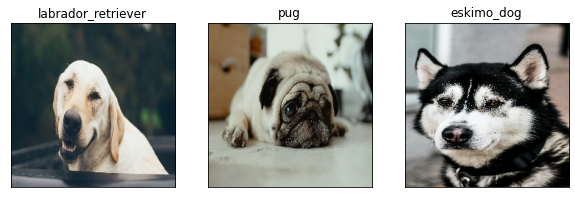

In [ ]:
# Check custom predictions
plt.figure(figsize= (10,10))
for i, image in enumerate(custom_images): 
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
